In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import FactorAnalysis
from scipy.stats import pearsonr

# Задание 1

In [2]:
df = pd.read_csv('data.csv')

In [3]:
def os_binary(os):
    if os == 'iOS':
        return 0
    else:
        return 1

def os_numbered(os):
    if os == 'iOS':
        return 0
    else:
        return 1

In [4]:
df['os_binary'] = df['os'].apply(os_binary)
df['os_numbered'] = df['os'].apply(os_numbered)
df = df.drop(columns=['Unnamed: 0'])
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,os_binary,os_numbered
0,512217,interest,150000,NaN,iOS,video,0.75,0,0
1,587720,interest,150000,NaN,Android,banner,0.50,1,1
2,833649,interest,150000,NaN,Android,video,0.75,1,1
3,47061,interest,150000,NaN,Android,banner,0.50,1,1
4,1035593,interest,150000,NaN,Android,partner_network,1.00,1,1
...,...,...,...,...,...,...,...,...,...
2737569,789473,purchase,201912,2136.0,Android,partner_network,1.00,1,1
2737570,1036500,purchase,202012,50.0,Android,traffic,0.00,1,1
2737571,539693,purchase,202053,50.0,iOS,traffic,0.00,0,0
2737572,583326,purchase,202140,1099.0,Android,traffic,0.00,1,1


# Задание 2

In [5]:
df['price'] = df['price'].fillna(0)
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,os_binary,os_numbered
0,512217,interest,150000,NaN,iOS,video,0.75,0,0
1,587720,interest,150000,NaN,Android,banner,0.50,1,1
2,833649,interest,150000,NaN,Android,video,0.75,1,1
3,47061,interest,150000,NaN,Android,banner,0.50,1,1
4,1035593,interest,150000,NaN,Android,partner_network,1.00,1,1
...,...,...,...,...,...,...,...,...,...
2737569,789473,purchase,201912,2136.0,Android,partner_network,1.00,1,1
2737570,1036500,purchase,202012,50.0,Android,traffic,0.00,1,1
2737571,539693,purchase,202053,50.0,iOS,traffic,0.00,0,0
2737572,583326,purchase,202140,1099.0,Android,traffic,0.00,1,1


In [6]:
df['funnel_stage'] = pd.factorize(df['funnel_stage'])[0]

In [7]:
corr_matrix = df[['price', 'user_id']].corr()
print(corr_matrix)

            price   user_id
price    1.000000  0.018147
user_id  0.018147  1.000000


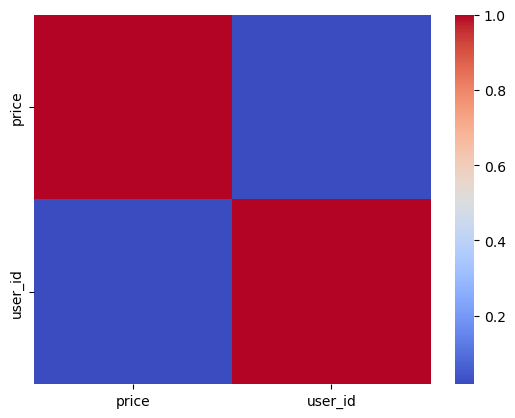

In [8]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [9]:
price, user_id = df[['price', 'user_id']].values.T
corr, _ = pearsonr(price, user_id)
print("Коэффицент корреляции Пирсона:", corr)

Коэффицент корреляции Пирсона: 0.018147469151452014


# Задание 3

In [10]:
le = LabelEncoder()
df['ad_channel'] = le.fit_transform(df['ad_channel'])

In [11]:
df['ad_channel'] = pd.factorize(df['ad_channel'])[0]
fa = FactorAnalysis(n_components=1)
fa.fit(df[['ad_channel']])

FactorAnalysis(n_components=1)

In [12]:
df.dtypes

user_id           int64
funnel_stage      int64
timestamp         int64
profit          float64
os               object
ad_channel        int64
price           float64
os_binary         int64
os_numbered       int64
dtype: object

In [33]:
df['ad_channel'] = pd.to_numeric(df['ad_channel'], errors='coerce')
ad_channel = df['ad_channel'].values.reshape(-1, 1)

fa = FactorAnalysis(n_components=2)
factor_scores = fa.fit_transform(ad_channel)

df['Factor1'] = factor_scores[:, 0]
df['Factor2'] = factor_scores[:, -1]
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,os_binary,os_numbered,Factor1,Factor2
0,512217,0,150000,NaN,iOS,0,0.75,0,0,-0.893219,-0.893219
1,587720,0,150000,NaN,Android,1,0.50,1,1,-0.412389,-0.412389
2,833649,0,150000,NaN,Android,0,0.75,1,1,-0.893219,-0.893219
3,47061,0,150000,NaN,Android,1,0.50,1,1,-0.412389,-0.412389
4,1035593,0,150000,NaN,Android,2,1.00,1,1,0.068440,0.068440
...,...,...,...,...,...,...,...,...,...,...,...
2737569,789473,3,201912,2136.0,Android,2,1.00,1,1,0.068440,0.068440
2737570,1036500,3,202012,50.0,Android,4,0.00,1,1,1.030099,1.030099
2737571,539693,3,202053,50.0,iOS,4,0.00,0,0,1.030099,1.030099
2737572,583326,3,202140,1099.0,Android,4,0.00,1,1,1.030099,1.030099


# Выводы

Опираясь на данные, которые мы видим в датафрейме исходя из полученных матриц и результатов, мы можем сказать, что при использовании коэффициента Пирсона, корреляция для цен и id пользователя зависимы, так же при построении таблицы они принимают значения друг друга. 

При проведении теста Бартлетта, мы видим, что колонки Factor1 и Factor2 совпадают по значениям после проведения факторного анализа данного датафрейма